In [7]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [8]:
columns='YearsExperience Salary'.split()
data1=pd.read_csv("dataset/salary_data.csv", encoding = "ISO-8859-1")
df=pd.DataFrame(data1,columns=['YearsExperience', 'Salary'])

In [9]:
def set_data(YearsExperience_train, Salary_train):
    YearsEx=[]
    Salary=[]
    for i in YearsExperience_train:
        YearsEx.append(i)
    for j in Salary_train:
        Salary.append(j)
    return YearsEx,Salary

def find_m_c(YearsEx,Salary):
    mx=sum(YearsEx)/len(YearsEx)#average of YearsEx
    my=sum(Salary)/len(Salary)#average of YearsEx
    
    nu=de=0
    for i  in range(len(YearsEx)):
        nu+=(YearsEx[i]-mx)*(Salary[i]-my)
        de+=(YearsEx[i]-mx)**2
        m=nu/de
        c=my-m*mx
    return m,c

In [10]:
def error(m,c,YearsEx,Salary):    
    Error=[]
    y1=[]
    v=0
    for i in range(len(YearsEx)):
        temp=m*YearsEx[i]+c
        y1.append(temp)

    for i in range(len(YearsEx)):
        v+=1/len(YearsEx)*((Salary[i]-y1[i])**2)
        Error.append(v)
    return Error,y1

In [11]:
def train(y1,YearsEx,Salary):
    m=c=0
    L=0.1
    epochs=29000
    y1=np.array(y1)
    while(epochs>0):
        for i in range(len(YearsEx)):
            Dm=(-2/len(YearsEx))*(YearsEx[i]*(Salary[i]-((m*YearsEx[i])+c)))
            Dc=(-2/len(YearsEx))*(Salary[i]-(m*YearsEx[i])-c)
            m=m-L*Dm
            c=c-L*Dc
        for i in range(len(YearsEx)):
            y1[i]=m*YearsEx[i]+c
        epochs=epochs-1
    return y1,m,c

9449.962321455077 25792.20019866869


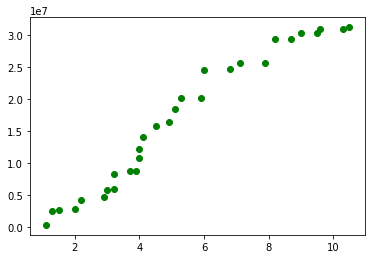

In [12]:
YearsEx_train,Salary_train=set_data(df['YearsExperience'],df['Salary'])
m,c=find_m_c(YearsEx_train,Salary_train)
print(m,c)
Error,y1_train=error(m,c,YearsEx_train,Salary_train)   
plt.scatter(YearsEx_train,Error,color='green')

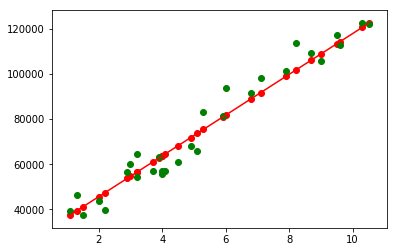

In [13]:
yy1_train,m_pred,c_pred=train(y1_train,YearsEx_train,Salary_train)
plt.plot(YearsEx_train,yy1_train,color='red')
plt.scatter(YearsEx_train,yy1_train,color='red')
plt.scatter(YearsEx_train,Salary_train,color='green')

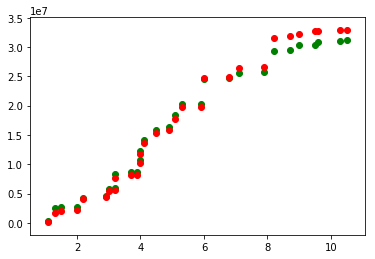

In [14]:
Error_after_train,yy1_train=error(m_pred,c_pred,YearsEx_train,Salary_train)
plt.scatter(YearsEx_train,Error,color='green')
plt.scatter(YearsEx_train,Error_after_train,color='red')

In [17]:
print(m_pred,c_pred)
x=float(input("Years of Experience : "))
y=m_pred*x+c_pred
print("Predict Money for this Experience:",round(y))

9021.898671092395 27611.909995319053
Years of Experience : 1.9
Predict Money for this Experience: 44754


In [16]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189
